In [1]:
# import the library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense,  Dropout
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix,accuracy_score
from sklearn.utils import resample

2024-03-18 11:23:41.985533: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-18 11:23:41.985614: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-18 11:23:41.987389: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
#loading data
data = pd.read_csv("/kaggle/input/heart-feilure/heart_failure_clinical_records_dataset.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


(299, 13)

In [4]:
majority_class = data[data['DEATH_EVENT'] == 0]
minority_class = data[data['DEATH_EVENT'] == 1]

In [5]:
majority_class

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
14,49.0,1,80,0,30,1,427000.0,1.0,138,0,0,12,0
20,65.0,1,52,0,25,1,276000.0,1.3,137,0,0,16,0
23,53.0,0,63,1,60,0,368000.0,0.8,135,1,0,22,0
33,50.0,1,159,1,30,0,302000.0,1.2,138,0,0,29,0
38,60.0,0,2656,1,30,0,305000.0,2.3,137,1,0,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0


In [6]:
# Upsample minority class
upsampled_minority_class = resample(minority_class,
                                    replace=True,  # sample with replacement
                                    n_samples=len(majority_class),  # match majority class
                                    random_state=0)  # reproducible results

In [7]:
# Combine majority class and upsampled minority class
upsampled_data = pd.concat([majority_class, upsampled_minority_class])

<Axes: xlabel='DEATH_EVENT', ylabel='count'>

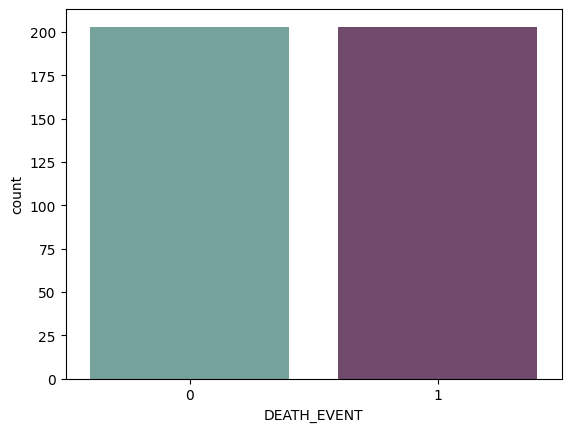

In [8]:
# evaluate the target and find out if our data is balanced or not
cols= ["#6daa9f","#774571"]
sns.countplot(x= upsampled_data["DEATH_EVENT"], palette= cols)


In [9]:
X=data.drop(["DEATH_EVENT"],axis=1)
y=data["DEATH_EVENT"]

In [10]:
col_names = list(X.columns)
standard_scaler = preprocessing.StandardScaler() 
X_scale= standard_scaler.fit_transform(X)
X_scale = pd.DataFrame(X_scale, columns=col_names)   
X_scale.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1.192945,-0.871105,0.000166,-0.847579,-1.530560,1.359272,1.681648e-02,0.490057,-1.504036,0.735688,-0.687682,-1.629502
1,-0.491279,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,0.735688,-0.687682,-1.603691
2,0.350833,-0.871105,-0.449939,-0.847579,-1.530560,-0.735688,-1.038073e+00,-0.090900,-1.731046,0.735688,1.454161,-1.590785
3,-0.912335,1.147968,-0.486071,-0.847579,-1.530560,-0.735688,-5.464741e-01,0.490057,0.085034,0.735688,-0.687682,-1.590785
4,0.350833,1.147968,-0.435486,1.179830,-1.530560,-0.735688,6.517986e-01,1.264666,-4.682176,-1.359272,-0.687682,-1.577879


In [11]:

X_train, X_test, y_train,y_test = train_test_split(X_scale,y,test_size=0.25,random_state=0)
X_train.shape

(224, 12)

In [12]:

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, 
    patience=30, 
    restore_best_weights=True)

In [13]:

model = Sequential()
model.add(Dense(units = 16, activation = 'relu', input_shape = (12,)))

model.add(Dense(units = 8,  activation = 'relu')) 

model.add(Dense(units = 1,  activation = 'sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# Compiling the ANN
# optimizer=’adam’: This parameter helps to find the optimum values of each weight in the neural network.
# use the binary_crossentropy in loss because is the binary classifcation 0 ,1
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# loss parameters tupe :
# 1- Regression: One neuron in the output layer (MSE)
# 2- Classification(Binary): Two neurons in the output layer (binary_crossentropy)
# 3- Classification(Multi-class): The number of neurons in the output layer is equal to the unique classes (cross entropy)

In [15]:
# Train the ANN
history = model.fit(X_train, y_train, batch_size = 16, epochs = 500,callbacks=[early_stopping], validation_split=0.2)

# batch_size = 32 >>  mean that 32 rows will be passed to the Network in one go

Epoch 1/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.4753 - loss: 0.6921 - val_accuracy: 0.6222 - val_loss: 0.6507
Epoch 2/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6021 - loss: 0.6516 - val_accuracy: 0.6444 - val_loss: 0.6260
Epoch 3/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7023 - loss: 0.6164 - val_accuracy: 0.6667 - val_loss: 0.6076
Epoch 4/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7512 - loss: 0.5886 - val_accuracy: 0.7111 - val_loss: 0.5904
Epoch 5/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7874 - loss: 0.5836 - val_accuracy: 0.7333 - val_loss: 0.5751
Epoch 6/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8060 - loss: 0.5455 - val_accuracy: 0.7556 - val_loss: 0.5602
Epoch 7/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8401 - loss: 0.5198 - val_accuracy: 0.7778 - val_loss: 0.5476
Epoch 8/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8557 - loss: 0.5056 - val_accuracy: 0.8000 - 

In [16]:
# print the val_accuracy 
val_accuracy = np.max(history.history['val_accuracy'])
accuracy = np.mean(history.history['accuracy'])
print("\n%s: %.2f %% " % ('val_accuracy', val_accuracy*100))


val_accuracy: 80.00 % 


In [17]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5) 
test_data_accuracy = accuracy_score(y_pred, y_test)
print(f"test accuracy = {test_data_accuracy*100}" )

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
test accuracy = 77.33333333333333


In [18]:
history = pd.DataFrame(history.history)
history.head()

,accuracy,loss,val_accuracy,val_loss
0,0.519553,0.672318,0.622222,0.650743
1,0.631285,0.636931,0.644444,0.626025
2,0.726257,0.602648,0.666667,0.607637
3,0.770950,0.577674,0.711111,0.590390
4,0.804469,0.551079,0.733333,0.575142


In [19]:
pd.DataFrame(y_test)

,DEATH_EVENT
206,0
188,0
12,1
219,0
237,0
...,...
156,0
226,0
272,0
27,1


In [20]:
# test with one row in dataset
inputx=(1.192945,-0.871105,0.000166,-0.847579,-1.530560,1.359272,
        1.681648e-02,0.490057,-1.504036,0.735688,-0.687682,-1.629502)
# one raw in dataset

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(inputx)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction<= 0.5):
  print('Not Have Heart problems')
else:
  print('Have Heart problems')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[0.9250925]]
Have Heart problems
